In [1]:
import pandas as pd

In [2]:
accepted = pd.read_csv("data/LC/Lending_Club_Accepted_2014_2018.csv", low_memory=False)
rejected = pd.read_csv("data/LC/Lending_Club_Rejected_2014_2018.csv")

In [3]:
len(accepted), len(rejected)

(2029952, 26132308)

In [20]:
accepted.rename(columns = {'addr_state': 'state'}, inplace=True)
rejected.rename(columns = {'State': 'state'}, inplace=True)

In [30]:
accepted['month'] = pd.to_datetime(accepted['issue_d']).dt.to_period('M')
rejected['month'] = pd.to_datetime(rejected['Application_Date']).dt.to_period('M')

accepted['quarter'] = pd.to_datetime(accepted['issue_d']).dt.to_period('Q')
rejected['quarter'] = pd.to_datetime(rejected['Application_Date']).dt.to_period('Q')

accepted['year'] = pd.to_datetime(accepted['issue_d']).dt.to_period('Y')
rejected['year'] = pd.to_datetime(rejected['Application_Date']).dt.to_period('Y')

<AxesSubplot:xlabel='state'>

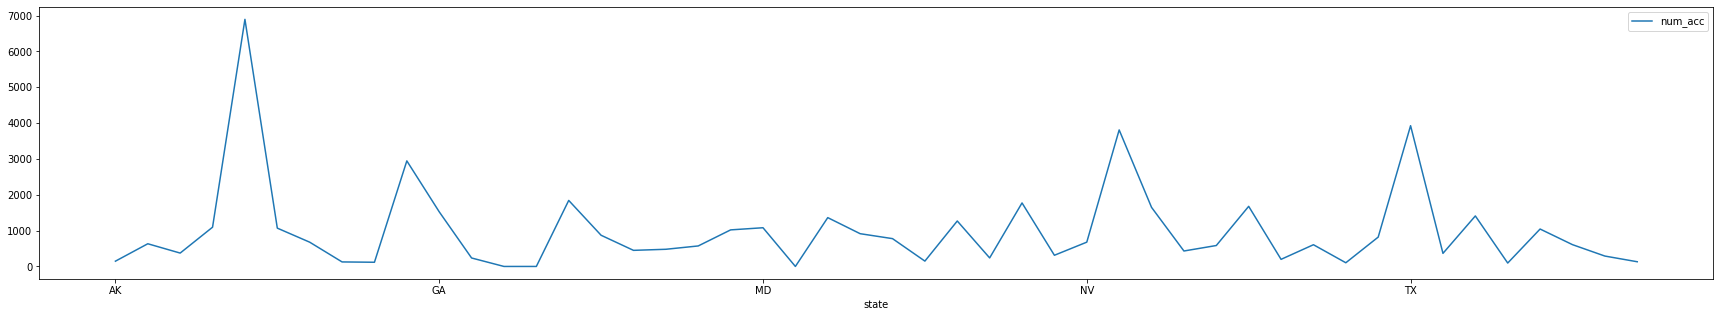

In [44]:
df = accepted.groupby(['quarter', 'state']).size().reset_index()
df.rename(columns = {0:"num_acc"}, inplace=True)
df = df[df['quarter'] == '2014Q1']
df.plot(x = 'state', y = 'num_acc', figsize=(30, 5))

<AxesSubplot:xlabel='month'>

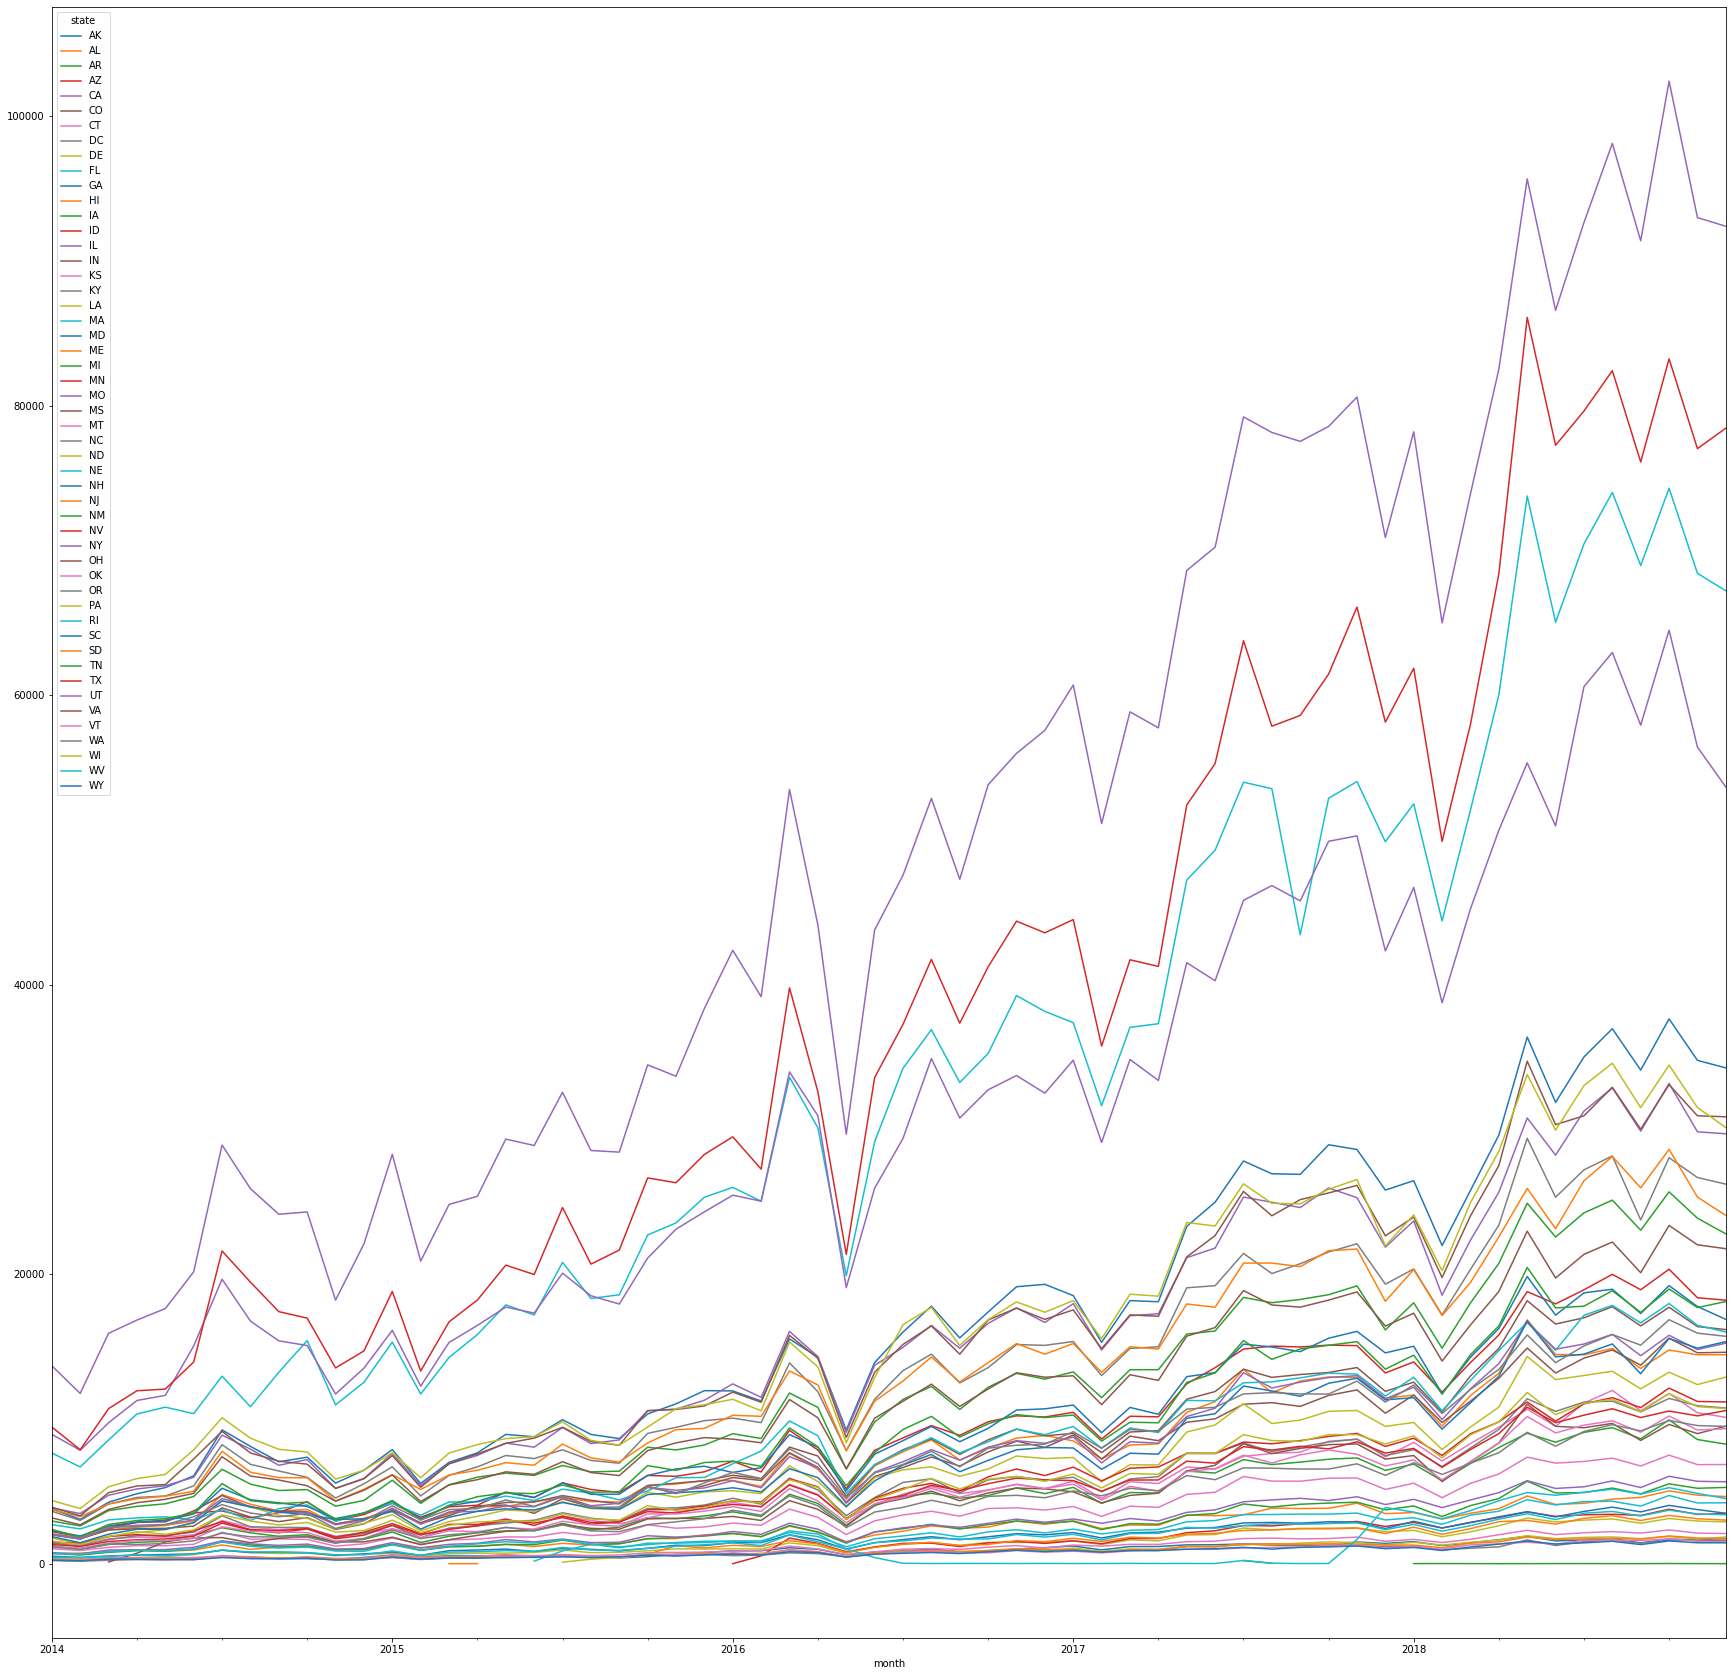

In [23]:
rejected.groupby(['month', 'state']).size().unstack().plot(figsize=(30,30))